# Coupled Oscillator Without Walls

The coupled differential equations we need to solve are: $m \ddot{x_1}+ K(x_1-x_2) = 0$ and $m \ddot{x_2} - K(x_1-x_2) =0$.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import numpy as np
sns.set_style('darkgrid')

In [5]:
def f1(t,x1,x2,v1):
    return -(k/m1)*(x1-x2) 

def f2(t,x1,x2,v2):
    return (k/m2)*(x1-x2)


# take inputs

k = float(input("Input the value of spring constant:"))
x10 = float(input("Enter the intial displacement of m1 :"))
x20 = float(input("Enter the intial displacement of m2 :"))
m1 = float(input("Enter the mass of m1 :"))
m2 = float(input("Enter the mass of m2 :"))


# intial conditions

v10 = 0  # intial velocities
v20 = 0

ti = 0  # time interval
tf = 50
n = 3000
h = (tf - ti) / n

t = ti
x1 = x10
x2 = x20
v1 = v10
v2 = v20

x1_list = [x10]
v1_list = [v10]
x2_list = [x20]
v2_list = [v20]
t_list = [ti]

for i in range(n):
    #print(t,x1,v1,x2,v2)
    
    k1x1 = v1
    j1x1 = f1(t,x1,x2,v1)
    k1x2 = v2
    j1x2 = f2(t,x1,x2,v2)
    
    k2x1 = v1 + (h*j1x1)/2.0
    j2x1 = f1(t+ h/2.0, x1+ (k1x1*h)/2.0, x2+ (k1x2*h)/2.0, v1 + (j1x1*h)/ 2.0)
    k2x2 = v2 + (h*j1x2)/2.0
    j2x2 = f2(t+ h/2.0, x1+ (k1x1*h)/2.0, x2+ (k1x2*h)/2.0 , v2 + (j1x2*h)/ 2.0)
    
    k3x1 = v1 + (h*j2x1)/2.0
    j3x1 = f1(t+ h/2.0, x1+ (k2x1*h)/2.0, x2+ (k2x2*h)/2.0, v1 + (j2x1*h)/ 2.0)
    k3x2 = v2 + (h*j2x2)/2.0
    j3x2 = f2(t+ h/2.0,x1+ (k2x1*h)/2.0, x2+ (k2x2*h)/2.0, v2 + (j2x2*h)/ 2.0)
    
    k4x1 = v1 + (h*j3x1)
    j4x1 = f1(t+ h, x1+ (k3x1*h), x2+ (k3x2*h)/2.0, v1 + (j3x1*h))
    k4x2 = v2 + (h*j3x2)
    j4x2 = f2(t+ h, x1+ (k3x1*h), x2+ (k3x2*h), v2 + (j3x2*h))
    
    x1 = x1 + h*(k1x1 + 2.0* k2x1 + 2.0* k3x1 + k4x1)/6.0
    v1 = v1 + h*(j1x1 + 2.0* j2x1 + 2.0* j3x1 + j4x1)/6.0
    x2 = x2 + h*(k1x2 + 2.0* k2x2 + 2.0* k3x2 + k4x2)/6.0
    v2 = v2 + h*(j1x2 + 2.0* j2x2 + 2.0* j3x2 + j4x2)/6.0
    t = t+h
    
    x1_list.append(x1)
    v1_list.append(v1)
    x2_list.append(x2)
    v2_list.append(v2)
    t_list.append(t)  

Input the value of spring constant:10
Enter the intial displacement of m1 :2
Enter the intial displacement of m2 :0
Enter the mass of m1 :4
Enter the mass of m2 :8


Text(0, 0.5, 'Position')

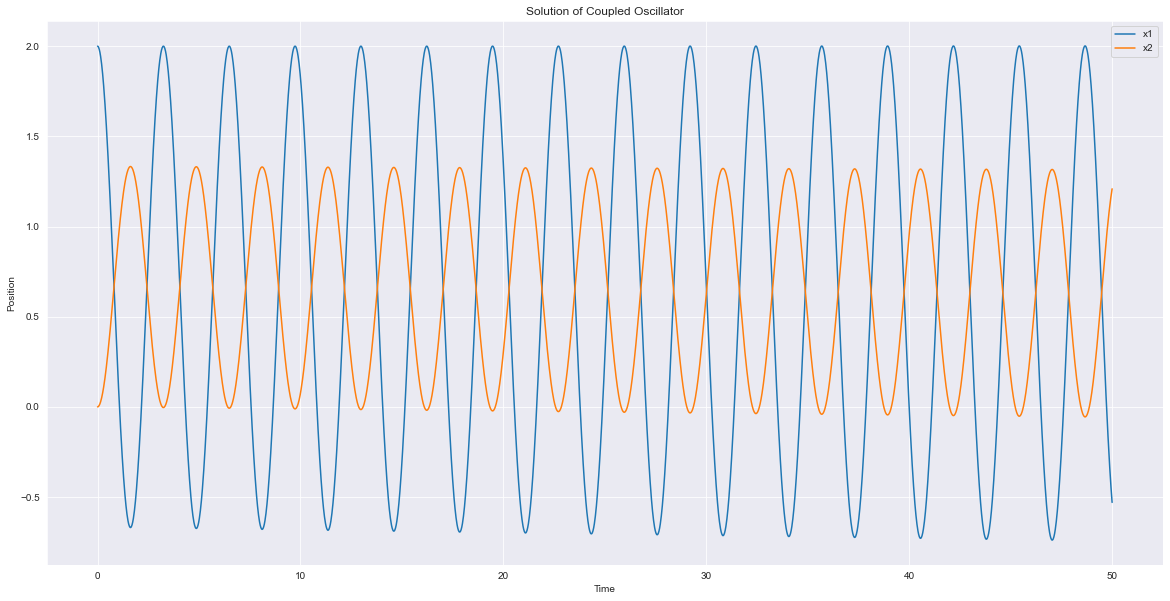

In [6]:
plt.plot(t_list, x1_list, label = "x1")
plt.plot(t_list, x2_list, label = "x2")
plt.legend()
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Solution of Coupled Oscillator")
plt.xlabel("Time")
plt.ylabel("Position") 

Text(0, 0.5, 'velocity')

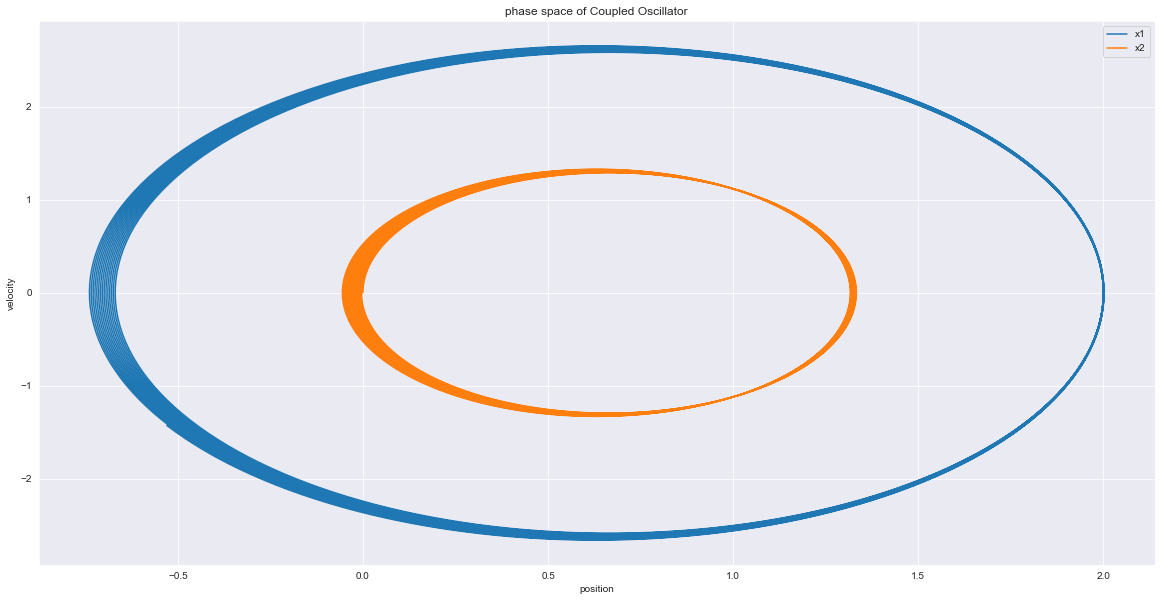

In [7]:
plt.plot(x1_list, v1_list, label = "x1")
plt.plot(x2_list, v2_list, label = "x2")
plt.legend()
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("phase space of Coupled Oscillator")
plt.xlabel("position")
plt.ylabel("velocity")